<a href="https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_03/mse_loss_gradient_descent_2d.ipynb"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="open in colab">
</a>
| [open in colab](https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_03/mse_loss_gradient_descent_2d.ipynb)




In [0]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline


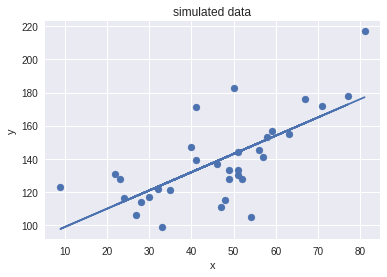

intercept =  87.67143 solpe =  1.1050216


In [3]:
###################
## Blood Pressure data
#x = [22, 41, 52, 23, 41, 54, 24, 46, 56, 27, 47, 57, 28, 48, 58,  9, 
#     49, 59, 30, 49, 63, 32, 50, 67, 33, 51, 71, 35, 51, 77, 40, 51, 81]
#y = [131, 139, 128, 128, 171, 105, 116, 137, 145, 106, 111, 141, 114, 
#     115, 153, 123, 133, 157, 117, 128, 155, 122, 183,
#     176,  99, 130, 172, 121, 133, 178, 147, 144, 217] 
#x = np.asarray(x, np.float32) 
#y = np.asarray(y, np.float32) 


#################
## Simulated data 
n = 50
np.random.seed(42)
x = np.random.normal(0,1,n)
y = x + 1 + np.random.normal(0,1,n) 

plt.scatter(x=x,y=y)
plt.title("simulated data")
plt.xlabel("x")
plt.ylabel("y")

from sklearn.linear_model import LinearRegression
model = LinearRegression()
res = model.fit(x.reshape((len(x),1)), y)
predictions = model.predict(x.reshape((len(x),1)))
plt.plot(x, predictions)

plt.show()
print("intercept = ",res.intercept_,"solpe = ", res.coef_[0],)

In [0]:
def loss(a,b):
  return 1/len(x)*(np.sum((a*x + b - y)**2))

In [5]:
loss(1.0410217387867964 ,1.1030756454608008)

8364.136363636364

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


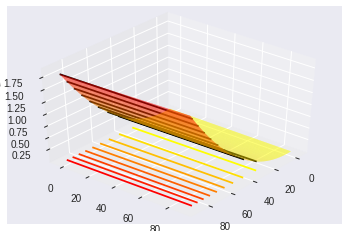

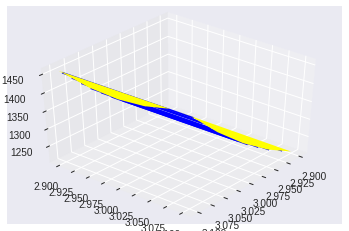

In [7]:
from mpl_toolkits.mplot3d import axes3d

def loss(a,b):
  return 1/len(x)*(np.sum((a*x + b - y)**2))

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
a = b = np.arange(-3.0, 4.0, 0.05)
A, B = np.meshgrid(a, b)
zs = np.array([loss(a,b) for a,b in zip(np.ravel(A), np.ravel(B))])
loss = zs.reshape(A.shape)

ax.plot_surface(A, B, loss, cmap="autumn_r", lw=3, rstride=9, cstride=9,edgecolor='none',alpha=0.7)
ax.contour(A, B, loss, 10, lw=3, cmap="autumn_r", linestyles="solid", offset=-1)
ax.contour(A, B, loss, 10, lw=3, colors="k", linestyles="solid")
ax.view_init(40, 40)
plt.show()

def loss(a,b):
  return 1/len(x)*(np.sum((a*x + b - y)**2))


fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
a = b = np.arange(2.9, 3.1, 0.05)
A, B = np.meshgrid(a, b)
zs = np.array([loss(a,b) for a,b in zip(np.ravel(A), np.ravel(B))])
loss = zs.reshape(A.shape)

ax.plot_surface(A, B, loss, cmap="autumn_r", lw=3, rstride=9, cstride=9,edgecolor='none')
ax.contour(A, B, loss, 10, lw=3, cmap="autumn_r", linestyles="solid", offset=-1)
ax.contour(A, B, loss, 10, lw=3, colors="blue", linestyles="solid")
ax.view_init(40, 40)
plt.show()

## The gradients needed

The gradients are given as:

$$
  grad_a = \frac{\partial}{\partial a}\frac{1}{n}\sum_{i=1}^n(a x_i + b - y_i)^2 = \frac{2}{n}\sum_{i=1}^n(a x_i + b - y_i) x_i 
$$


$$
  grad_b = \frac{\partial}{\partial b}\frac{1}{n}\sum_{i=1}^n(a x_i + b - y_i)^2 = \frac{2}{n}\sum_{i=1}^n(a x_i + b - y_i)  
$$

In [0]:
def grad(a,b):
  y_hat = a*x + b
  n2 = 2.0 / len(x)
  return n2*np.sum((y_hat - y)*x) , n2*np.sum((y_hat - y))


def loss(a,b):
  return 1/len(y)*(np.sum((a*x + b - y)**2))

In [0]:
eta = 0.05
a_ = -1.0
b_ = -3.0
loss_ = loss(a_,b_)
a_history = a_
b_history = b_
loss_history= loss_
for i in range(20):
    grad_a, grad_b  = grad(a_,b_)
    a_ = a_ - eta * grad_a
    b_ = b_ - eta * grad_b
    loss_= loss(a_,b_)
    a_history =np.append(a_history,a_) 
    b_history =np.append(b_history,a_) 
    loss_history =np.append(loss_history,loss_) 
    print("a = ", a_, "b = ", b_, "gard_a = ", grad_a, "gard_b = ", grad_b, "loss = ", loss_)

a =  -0.9007564689974985 b =  -2.643316694004433 gard_a =  -1.9848706200500295 gard_b =  -7.133666119911344 loss =  14.619625052368834
a =  -0.8024536003638466 b =  -2.3200640359577682 gard_a =  -1.9660573726730386 gard_b =  -6.465053160933297 loss =  12.435419807760221
a =  -0.7057600247540807 b =  -2.026920170546899 gard_a =  -1.9338715121953187 gard_b =  -5.862877308217389 loss =  10.611374242647074
a =  -0.6112089531436695 b =  -1.760910503866525 gard_a =  -1.8910214322082233 gard_b =  -5.320193333607477 loss =  9.084864289616158
a =  -0.5192182640592466 b =  -1.5193699239179732 gard_a =  -1.8398137816884577 gard_b =  -4.830811598971033 loss =  7.804763104632074
a =  -0.43010792080230675 b =  -1.2999092519727697 gard_a =  -1.7822068651387974 gard_b =  -4.389213438904068 loss =  6.729221874207139
a =  -0.34411505573414436 b =  -1.100385441512801 gard_a =  -1.7198573013632479 gard_b =  -3.990476209199375 loss =  5.823897269493842
a =  -0.2614070172839889 b =  -0.9188750973877208 gard

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


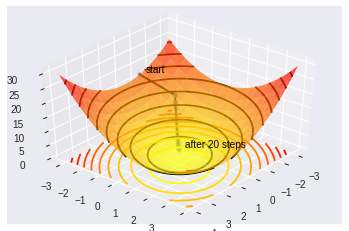

In [0]:
from mpl_toolkits.mplot3d import axes3d

def loss(a,b):
  return 1/len(x)*(np.sum((a*x + b - y)**2))

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot3D(a_history, b_history, loss_history, 'black',lw=2)
a = b = np.arange(-3.0, 4.0, 0.05)
A, B = np.meshgrid(a, b)
zs = np.array([loss(a,b) for a,b in zip(np.ravel(A), np.ravel(B))])
loss = zs.reshape(A.shape)

ax.plot_surface(A, B, loss, cmap="autumn_r", lw=3, rstride=9, cstride=9,edgecolor='none',alpha=0.7)
ax.contour(A, B, loss, 10, lw=3, cmap="autumn_r", linestyles="solid", offset=-1)
ax.contour(A, B, loss, 10, lw=3, colors="k", linestyles="solid")
ax.view_init(40, 40)

ax.scatter3D(a_history, b_history,loss_history,"black")
#for i in range(0,len(loss_history)):
ax.text(a_history[0]-0.4, b_history[0], loss_history[0], "start", color='black',zorder=100)
ax.text(a_history[-1]-0.4, b_history[-1], loss_history[-1], "after 20 steps", color='black',zorder=100)
plt.show()